In [1]:
import sys
sys.path.append('C:/Users/cjsso/project/bigkinds_parser/')

In [2]:
import BigKindsParser as bkp

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [4]:
plt.rcParams["font.family"] = "Hancom MalangMalang"
plt.rcParams['figure.figsize'] = 10,10
sns.set(font="Hancom MalangMalang", rc={"axes.unicode_minus":False}, style='white')

In [5]:
df = pd.read_excel('./econo_columns_20170510-20220509.xlsx')

## 언론사 빈도 확인

In [6]:
df_key = bkp.press_counter(df)

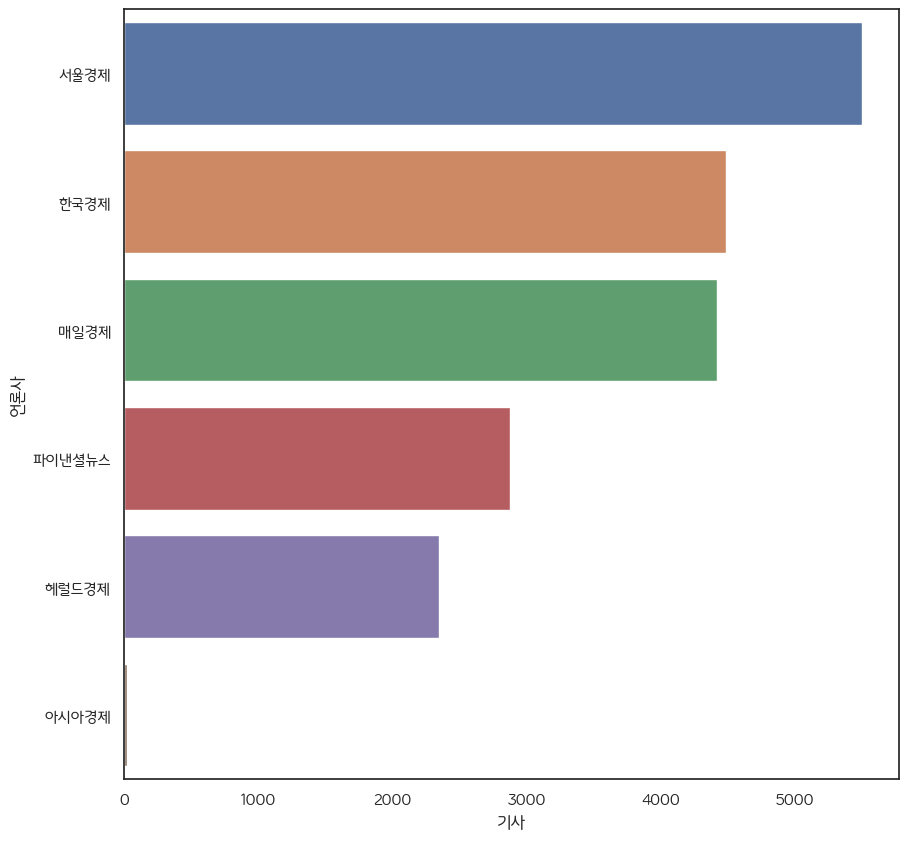

<Figure size 1000x1000 with 0 Axes>

In [8]:
sns.barplot(data = df_key, x = '기사', y = '언론사')

plt.figure(facecolor = 'white')
plt.show()

## 이상치 확인

In [9]:
outlier = df[df['언론사'] == '아시아경제'] ##아시아 경제 기사 추가 크롤링 필요

In [10]:
outlier.info

<bound method DataFrame.info of             뉴스 식별자        일자    언론사  기고자                                 제목  \
238   2.100801e+06  20220415  아시아경제  이지은        [기자수첩] 퇴임 기자회견 생략한 '소통 대통령'   
387   2.100801e+06  20220331  아시아경제  서소정                        [초동시각] 통화전쟁   
398   2.100801e+06  20220330  아시아경제  배경환                     [초동시각]인수위의 '삽'   
639   2.100801e+06  20220307  아시아경제  NaN      [시론]한국은행의 국채 매입과 통화정책의 (불)투명성   
898   2.100801e+06  20220209  아시아경제  유현석        [톺아보기]대한민국의 항공산업, 원팀만이 살길이다   
1400  2.100801e+06  20211217  아시아경제  차민영        [시시비비]디지털 시대, 정부 시장 괴리 해결돼야   
2334  2.100801e+06  20210910  아시아경제  이종길                 [최준영의 도시순례]신도시와 골목   
2711  2.100801e+06  20210804  아시아경제  강희종              [시시비비]딜레마에 빠진 기후변화 대응   
2789  2.100801e+06  20210727  아시아경제  김현정               [광장] 더 든든해진 근로장려금 제도   
2895  2.100801e+06  20210716  아시아경제  이종길                  [최준영의 도시순례]서울의 기억   
3094  2.100801e+06  20210625  아시아경제  이종길              [최준영의 도시순례]전기의 시대와 도시   
3231  2.100801e+06  

In [11]:
outlier['일자'] #아시아경제 기사는 2021년부터 빅카인즈에 기사를 업로드 --> 2017~2020년 기사는 별도 크롤링 필요

238     20220415
387     20220331
398     20220330
639     20220307
898     20220209
1400    20211217
2334    20210910
2711    20210804
2789    20210727
2895    20210716
3094    20210625
3231    20210611
3371    20210528
3501    20210514
3639    20210430
3663    20210428
3733    20210421
3820    20210413
4376    20210215
4544    20210127
Name: 일자, dtype: int64

## 키워드 빈도

In [14]:
df_keywords = df['키워드']

In [15]:
keywords = bkp.keywords_list(df_keywords)

In [16]:
news_key = bkp.keyword_parser(keywords)
news_key = bkp.duplication_remover(news_key)
key = bkp.word_counter(news_key)

In [17]:
news_key = bkp.counter_to_DataFrame(key)

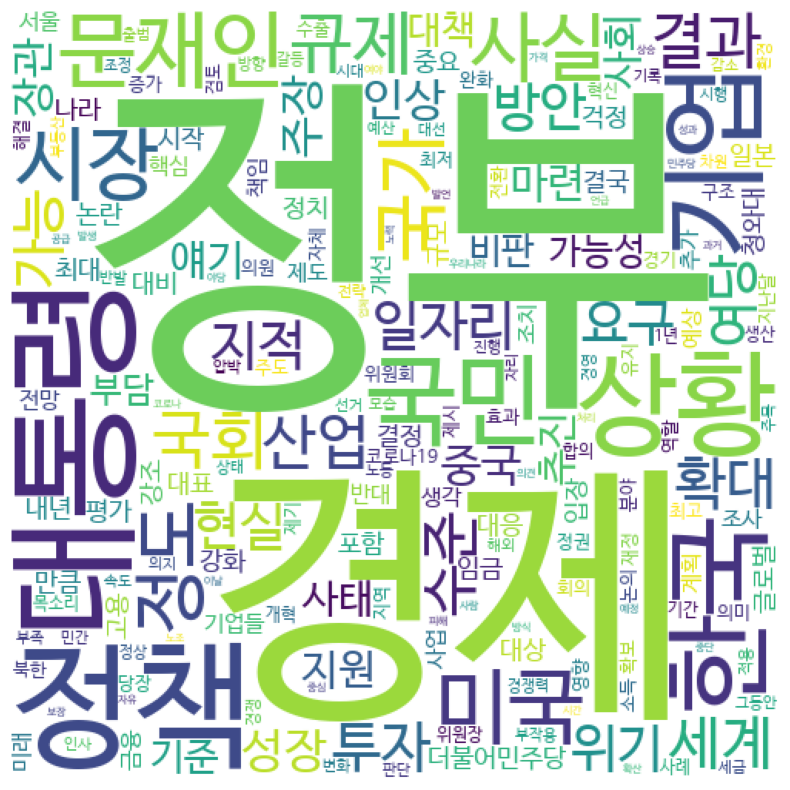

In [18]:
wc = WordCloud(font_path = 'C:/Users/cjsso/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(news_key.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 언론사별 키워드 분석 --> 한경

In [ ]:
han = bkp.press_keywords_analysis(df, '한국경제')

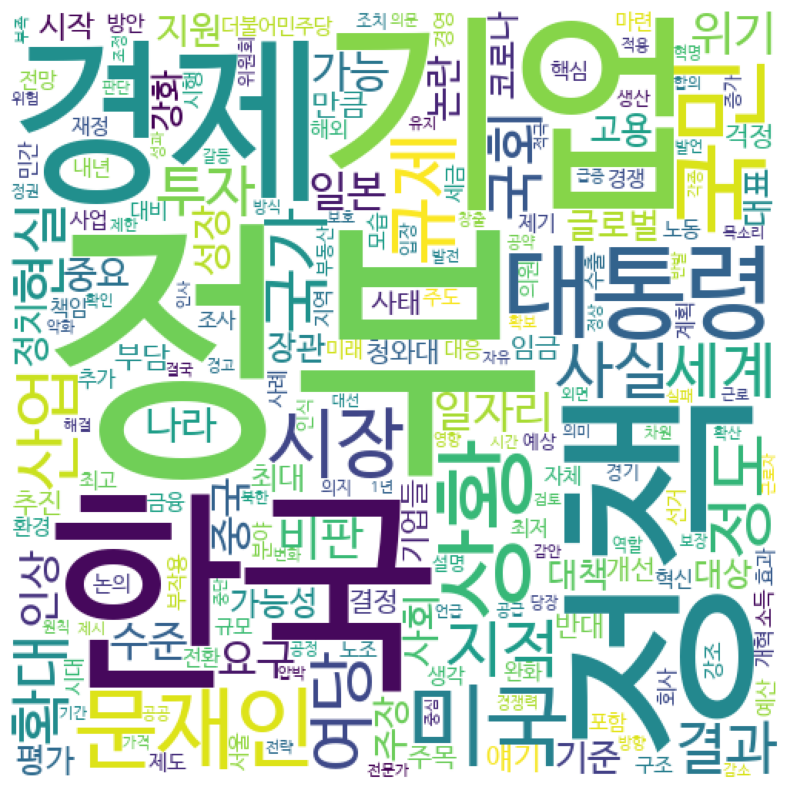

In [ ]:
wc = WordCloud(font_path = 'C:/Users/cjsso/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(han.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 언론사별 키워드 분석 --> 매경

In [ ]:
daily = bkp.press_keywords_analysis(df, '매일경제')

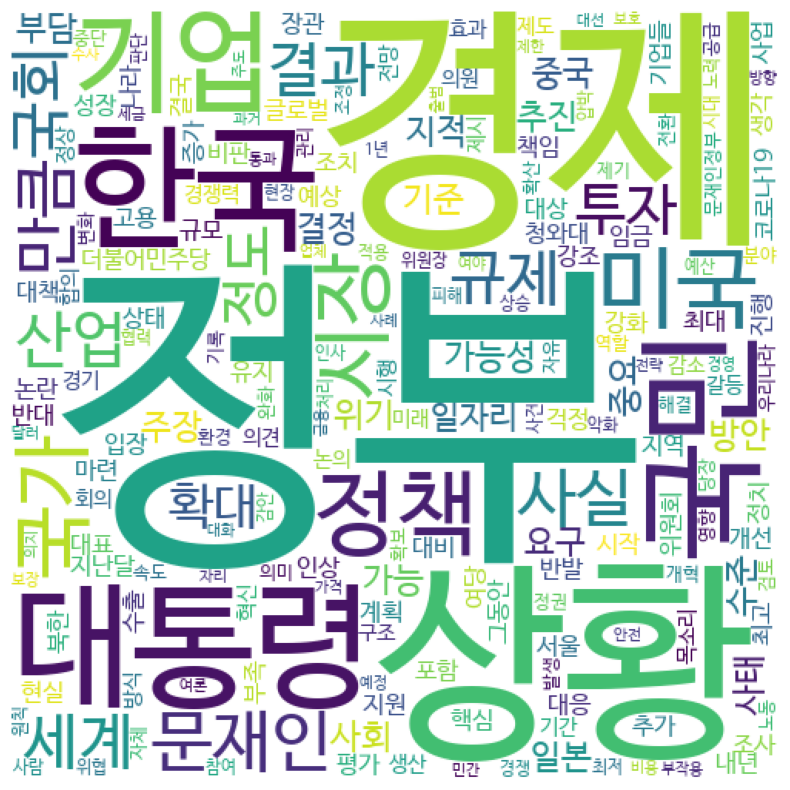

In [ ]:
wc = WordCloud(font_path = 'C:/Users/cjsso/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(daily.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 언론사별 키워드 분석 --> 서경

In [ ]:
seoul = bkp.press_keywords_analysis(df, '서울경제')

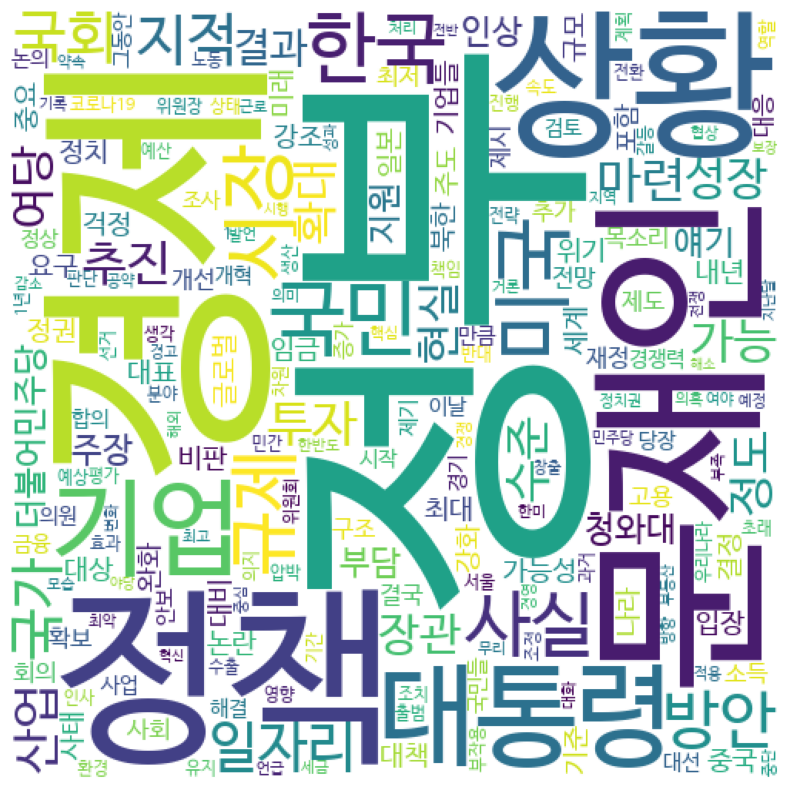

In [ ]:
wc = WordCloud(font_path = 'C:/Users/cjsso/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(seoul.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 언론사별 키워드 분석 --> 파이낸셜

In [ ]:
financial = bkp.press_keywords_analysis(df, '파이낸셜뉴스')

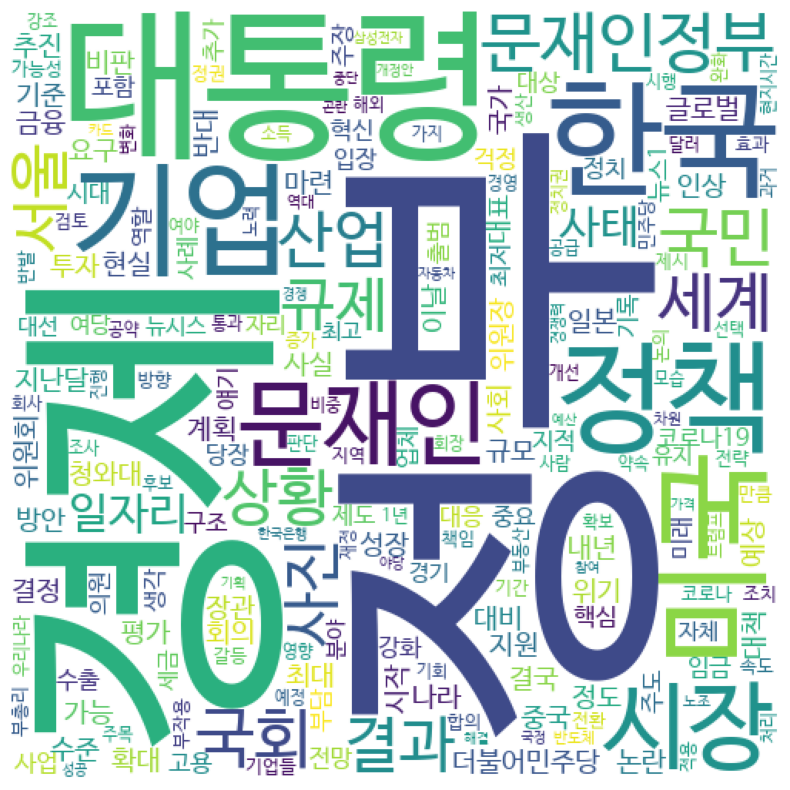

In [ ]:
wc = WordCloud(font_path = 'C:/Users/cjsso/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(financial.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 언론사별 키워드 분석 --> 헤럴드

In [ ]:
herold = bkp.press_keywords_analysis(df, '헤럴드경제')

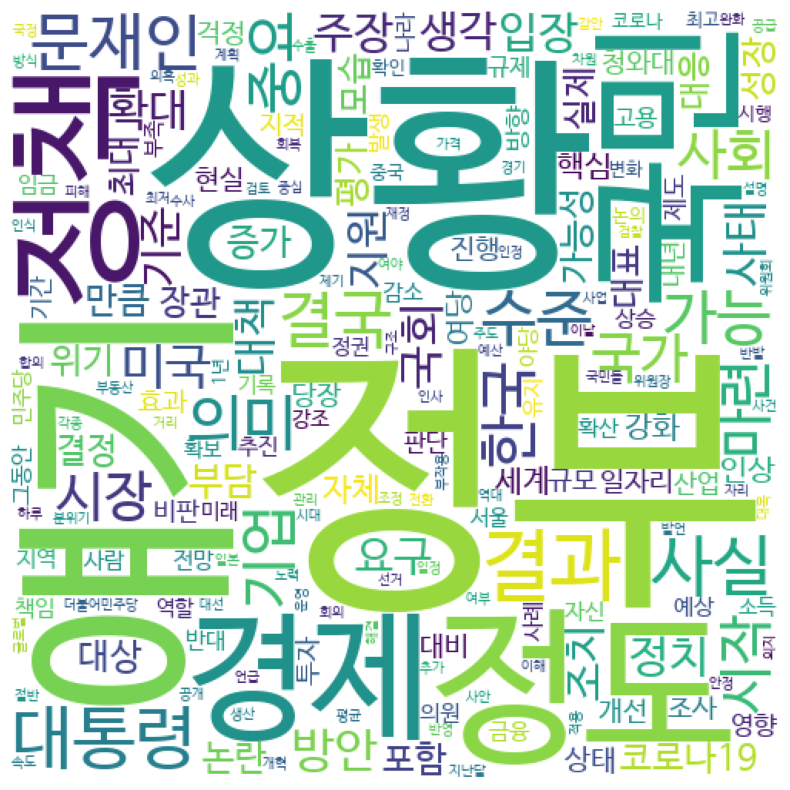

In [ ]:
wc = WordCloud(font_path = 'C:/Users/cjsso/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(herold.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

## TF-IDF 분석

언론사별 용어 빈도는 비슷 --> tf-idf를 통한 특징 추출 필요

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer #module import

### 한경 

In [23]:
han_words = df[df['언론사'] == '한국경제']

In [24]:
han_words = han_words['키워드']

In [25]:
tfidf = TfidfVectorizer()
tdm = tfidf.fit_transform(han_words)

In [26]:
word_count1 = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
}).sort_values('빈도', ascending = False).reset_index(drop = True)

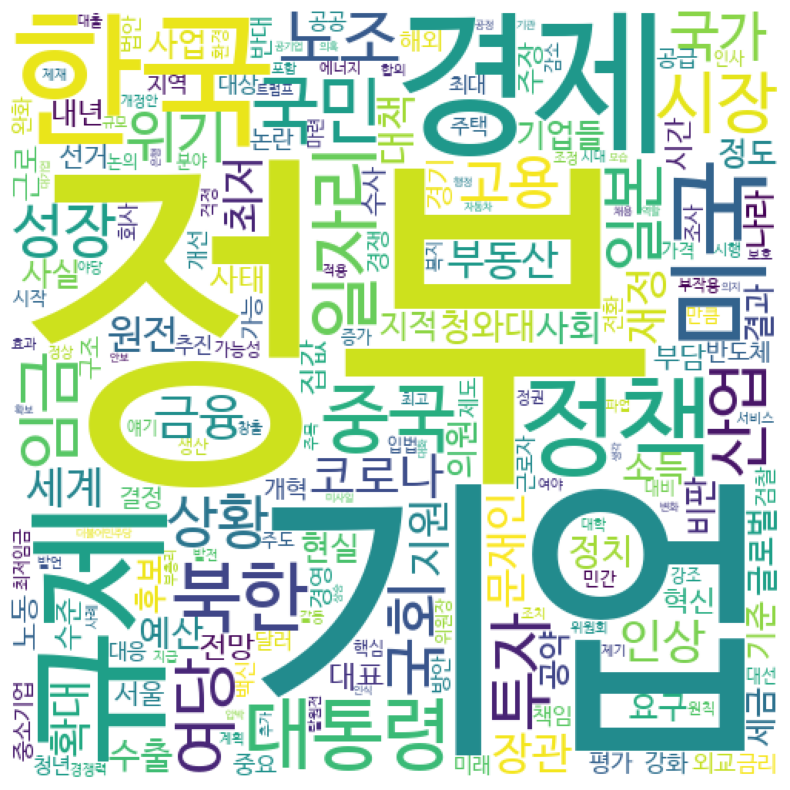

In [27]:
wc = WordCloud(font_path = 'C:/Users/cjsso/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(word_count1.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 매경

In [28]:
mail_words = df[df['언론사'] == '매일경제']

In [29]:
mail_words = mail_words['키워드']

In [30]:
tfidf = TfidfVectorizer()
tdm = tfidf.fit_transform(mail_words)

In [31]:
word_count2 = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
}).sort_values('빈도', ascending = False).reset_index(drop = True)

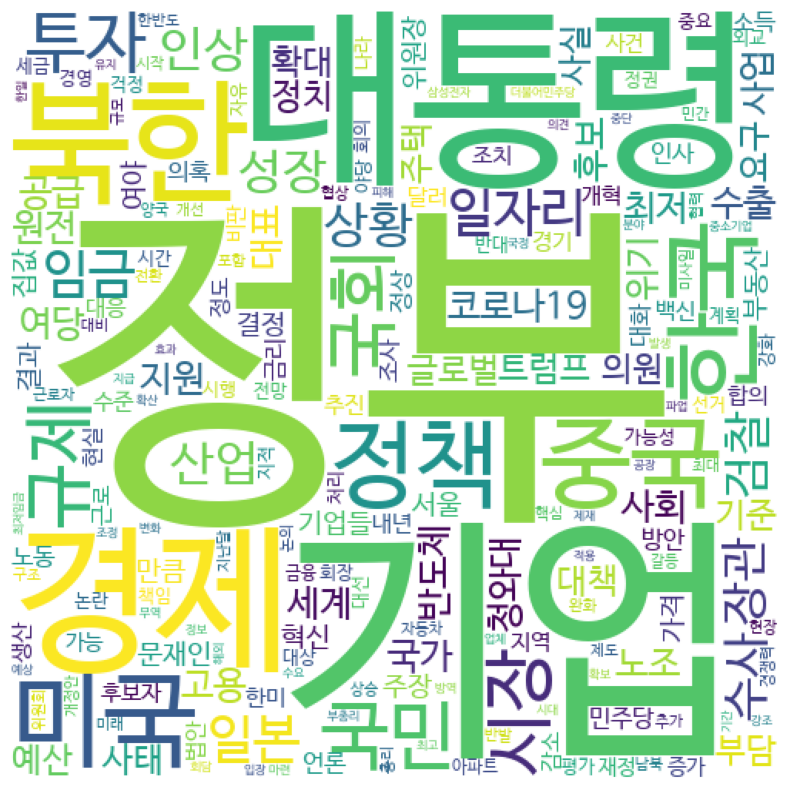

In [32]:
wc = WordCloud(font_path = 'C:/Users/cjsso/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(word_count2.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 서경

In [33]:
seo_words = df[df['언론사'] == '서울경제']

In [34]:
seo_words = seo_words['키워드']

In [35]:
tfidf = TfidfVectorizer()
tdm = tfidf.fit_transform(seo_words)

In [36]:
word_count3 = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
}).sort_values('빈도', ascending = False).reset_index(drop = True)

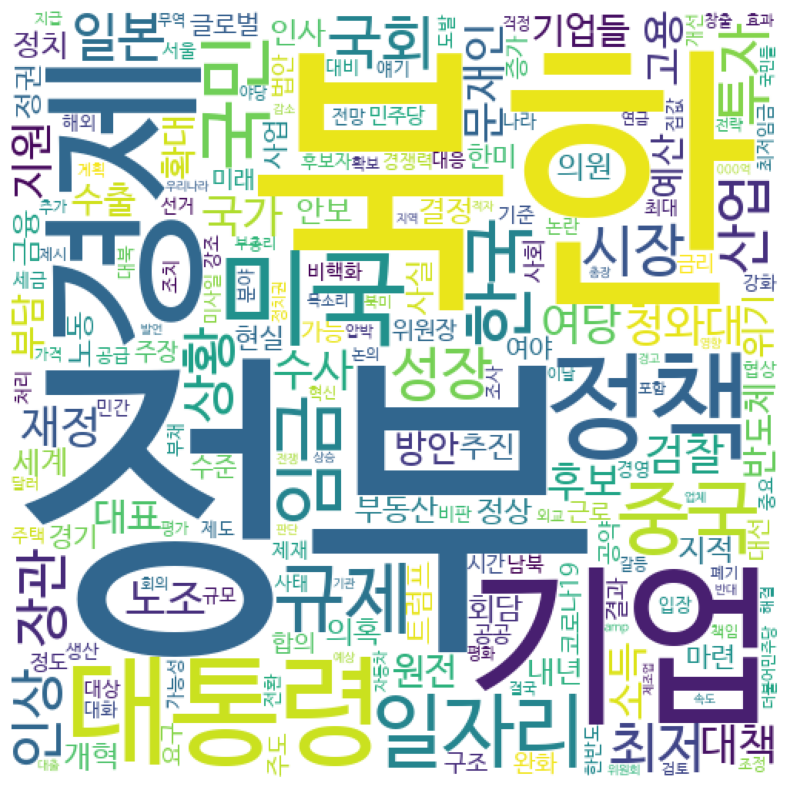

In [37]:
wc = WordCloud(font_path = 'C:/Users/cjsso/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(word_count3.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 파이낸셜

In [38]:
fin_words = df[df['언론사'] == '파이낸셜뉴스']

In [39]:
fin_words = fin_words['키워드']

In [40]:
tfidf = TfidfVectorizer()
tdm = tfidf.fit_transform(fin_words)

In [41]:
word_count4 = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
}).sort_values('빈도', ascending = False).reset_index(drop = True)

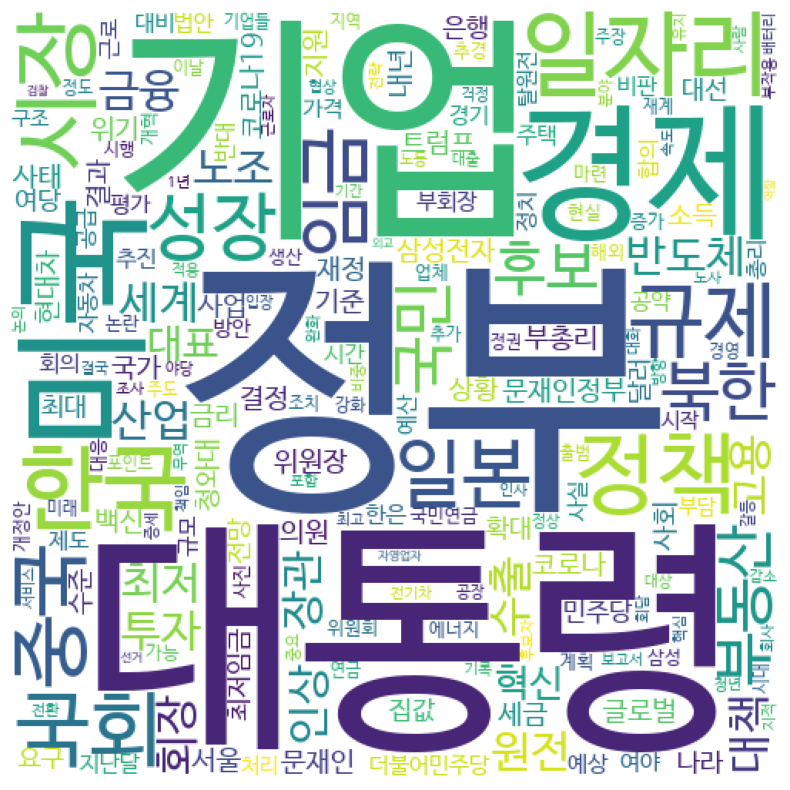

In [42]:
wc = WordCloud(font_path = 'C:/Users/cjsso/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(word_count4.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 헤럴드

In [43]:
hero_words = df[df['언론사'] == '헤럴드경제']

In [44]:
hero_words = hero_words['키워드']

In [45]:
tfidf = TfidfVectorizer()
tdm = tfidf.fit_transform(hero_words)

In [46]:
word_count5 = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
}).sort_values('빈도', ascending = False).reset_index(drop = True)

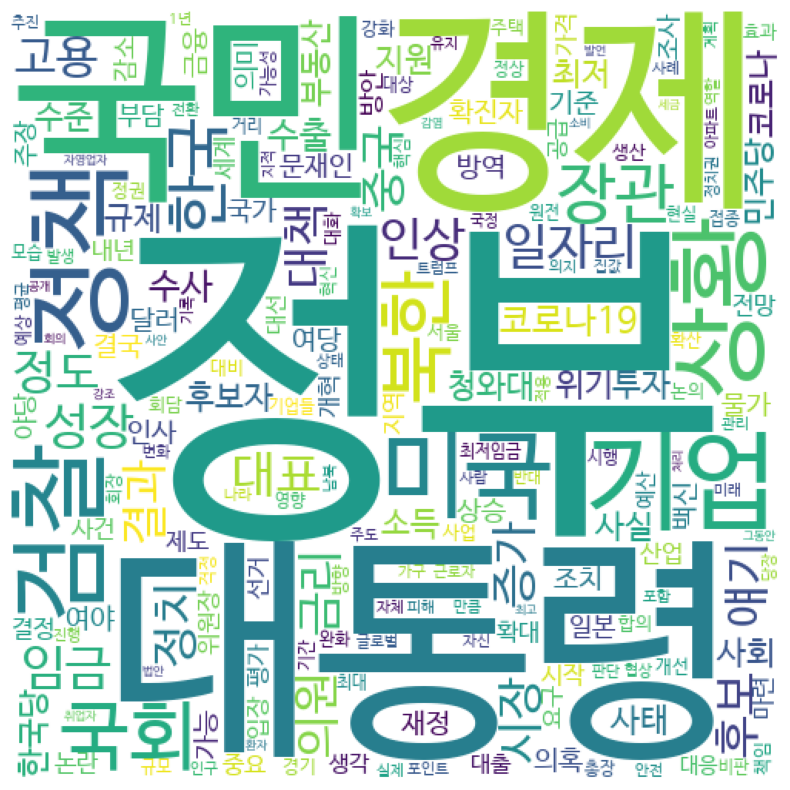

In [47]:
wc = WordCloud(font_path = 'C:/Users/cjsso/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(word_count5.set_index('단어').to_dict()["빈도"])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [48]:
words_df1 = pd.concat([word_count1, word_count2], join='outer', axis=1)

In [49]:
words_df1.columns = ['단어(한경)', '빈도(한경)', '단어(매경)', '빈도(매경)']

In [51]:
words_df2 = pd.concat([word_count3, word_count4, word_count5], join='outer', axis=1)

In [52]:
words_df2.columns = ['단어(서경)', '빈도(서경)','단어(파이낸셜)', '빈도(파이낸셜)','단어(헤럴드)', '빈도(헤럴드)']

In [53]:
words_df = pd.concat([words_df1, words_df2], join = 'outer', axis = 1)

In [ ]:
words_df.head(20)

단어(한경)      빈도(한경) 단어(매경)      빈도(매경) 단어(서경)      빈도(서경) 단어(파이낸셜)  \
0      정부  170.874039     정부  127.335164     정부  207.973736       정부   
1      기업  143.353837     기업  110.468213     북한  153.504708      대통령   
2      경제  109.593958    대통령  105.349634     기업  147.576313       기업   
3      규제   99.747167     경제   98.987800     경제  141.483724       경제   
4      한국   96.602629     북한   94.959321    대통령  136.803875       미국   
5      정책   95.039328     미국   93.682823     정책  125.951686      일자리   
6      미국   90.302124     중국   87.481722     미국  125.941853       한국   
7     대통령   89.964928     한국   86.394644    일자리  108.601917       정책   
8      북한   86.210303     정책   76.064262     중국  104.657793       시장   
9      중국   83.305281     국민   73.182543     규제  100.005150       규제   
10     국민   79.407091     규제   68.673798     국민   97.847511       국회   
11    일자리   79.164376     국회   64.407326     임금   88.199132       중국   
12     시장   68.216227     시장   63.713174     한국   84.390802       일본   
13     노조   67.212984     투자   61.656313     국회   83.832130       성장   
14     여당   64.899902    일자리   60.358299     투자   81.507045       임금   
15     투자   64.160446     임금   59.657628     시장   80.210144       북한   
16     임금   62.896762     일본   58.333997     성장   79.884542       국민   
17     산업   60.127337     성장   52.338215     장관   74.306424      부동산   
18     일본   58.510270     산업   52.099878     산업   73.267545       후보   
19     국회   58.063480     장관   51.585880     인상   73.013147      반도체   

     빈도(파이낸셜) 단어(헤럴드)    빈도(헤럴드)  
0   96.774121      정부  68.249231  
1   78.668422     대통령  55.984063  
2   73.745679      경제  47.226472  
3   66.228374      국민  43.421289  
4   60.756488      기업  43.096729  
5   58.554333      정책  41.426563  
6   57.845017      검찰  36.136012  
7   53.730281      상황  35.747487  
8   51.787001      미국  34.320186  
9   45.949896      국회  33.419709  
10  43.571681      북한  32.206295  
11  42.673492      장관  32.127931  
12  40.091627      한국  31.377541  
13  39.962075     일자리  30.921592  
14  39.627805      성장  30.897654  
15  39.523417      임금  30.480363  
16  38.434493      대표  29.536249  
17  35.483854      인상  28.477505  
18  34.080738      정도  28.369887  
19  33.821207      정치  27.913461

## Topic Modelling

In [19]:
news_words = bkp.keyword_parser(df_keywords)

In [22]:
import gensim
news_dict = gensim.corpora.Dictionary(news_words)
corpus = [news_dict.doc2bow(text) for text in news_words]

In [56]:
perplexity = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=news_dict)
    perplexity.append(ldamodel.log_perplexity(corpus))

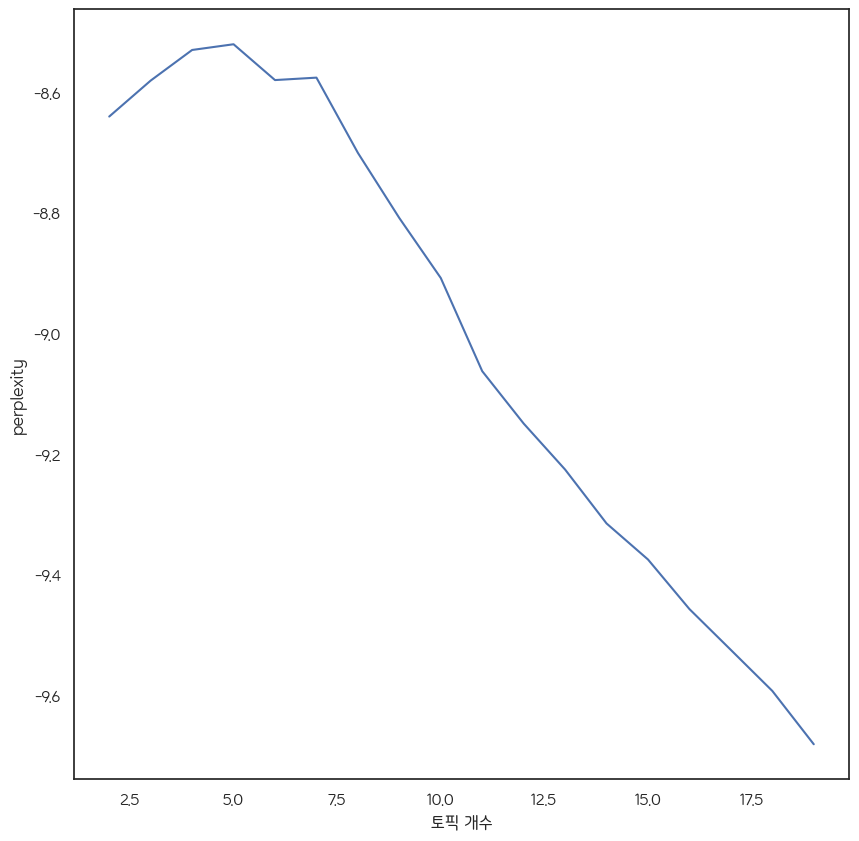

In [58]:
x = range(2,20)
plt.plot(x,perplexity)
plt.xlabel("토픽 개수")
plt.ylabel("perplexity")
plt.show()

In [59]:
coherence = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=news_dict)
    coherence_mo_lda = gensim.models.CoherenceModel(model = ldamodel, texts = news_words, dictionary = news_dict, topn=10) 
    coherence_lda = coherence_mo_lda.get_coherence()
    coherence.append(coherence_lda)

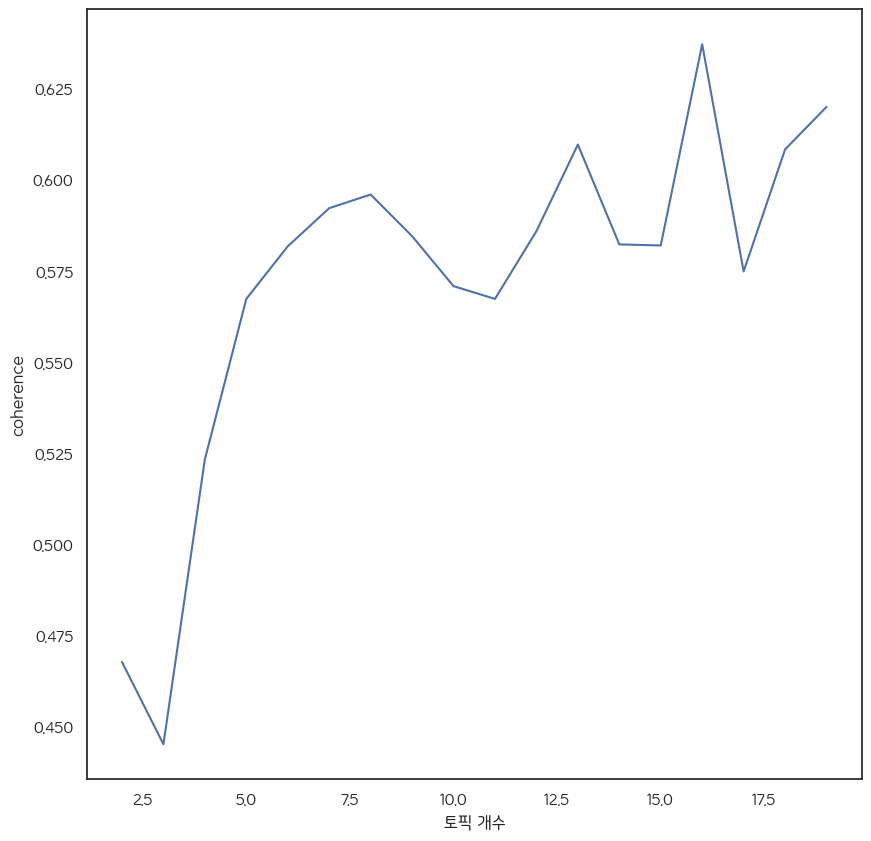

In [60]:
x = range(2,20)
plt.plot(x,coherence)
plt.xlabel("토픽 개수")
plt.ylabel("coherence")
plt.show()

In [24]:
NUM_TOPICS = 16
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=news_dict, passes=15)
topics = ldamodel.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.008*"사회" + 0.006*"정보" + 0.006*"사고" + 0.006*"발생" + 0.005*"정부"')
(1, '0.017*"국민" + 0.016*"정부" + 0.014*"의료" + 0.012*"연금" + 0.011*"코로나19"')
(2, '0.038*"일자리" + 0.037*"임금" + 0.024*"최저" + 0.021*"정부" + 0.020*"고용"')
(3, '0.035*"경제" + 0.021*"성장" + 0.012*"금리" + 0.012*"경기" + 0.011*"위기"')
(4, '0.028*"검찰" + 0.023*"수사" + 0.018*"의혹" + 0.013*"사건" + 0.011*"장관"')
(5, '0.051*"대통령" + 0.039*"정부" + 0.025*"정책" + 0.019*"경제" + 0.018*"청와대"')
(6, '0.024*"부동산" + 0.022*"정부" + 0.021*"시장" + 0.018*"주택" + 0.017*"집값"')
(7, '0.046*"중국" + 0.038*"미국" + 0.033*"한국" + 0.027*"일본" + 0.012*"정부"')
(8, '0.025*"국민" + 0.019*"정치" + 0.017*"대표" + 0.015*"후보" + 0.015*"선거"')
(9, '0.048*"기업" + 0.029*"규제" + 0.017*"정부" + 0.015*"투자" + 0.012*"금융"')
(10, '0.063*"국회" + 0.018*"여야" + 0.017*"여당" + 0.017*"법안" + 0.016*"처리"')
(11, '0.029*"산업" + 0.020*"기업" + 0.014*"시장" + 0.013*"세계" + 0.013*"반도체"')
(12, '0.035*"원전" + 0.027*"정부" + 0.017*"탈원전" + 0.016*"에너지" + 0.013*"정책"')
(13, '0.033*"정부" + 0.021*"재정" + 0.020*"예산" + 0.015*"지원" + 0.012*"소득"')
(14, '

In [25]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, news_dict)
pyLDAvis.display(vis)

c:\Users\cjsso\AppData\Local\R-MINI~1\envs\vspy\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [26]:
pyLDAvis.save_html(vis, 'economic_LDA.html') #LDAvis save

In [27]:
def make_topictable(ldamodel, corpus):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0: 
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
    return(topic_table)

In [29]:
topictable = make_topictable(ldamodel, corpus)
topictable = topictable.reset_index() 

In [30]:
topictable.columns = ['뉴스 번호', '주요 토픽', '주요 토픽 비중', '토픽 별 비중']
topictable.head(20)

뉴스 번호  주요 토픽  주요 토픽 비중                                            토픽 별 비중
0       0      5    0.3597  [(1, 0.024098625), (3, 0.07311826), (5, 0.3596...
1       1      4    0.4535  [(0, 0.12943223), (1, 0.031531826), (4, 0.4535...
2       2      5    0.2299  [(0, 0.01980223), (1, 0.016569229), (2, 0.1056...
3       3      9    0.3906  [(1, 0.029240616), (3, 0.27306145), (5, 0.2741...
4       4      5    0.4615  [(1, 0.06080873), (2, 0.017334457), (3, 0.0460...
5       5      5    0.5102  [(3, 0.016877692), (4, 0.103478596), (5, 0.510...
6       6      6    0.6470  [(3, 0.023293223), (5, 0.14949852), (6, 0.6470...
7       7      8    0.5166  [(0, 0.07691712), (2, 0.019741097), (8, 0.5166...
8       8      5    0.2190  [(0, 0.018016616), (2, 0.16323791), (3, 0.1278...
9       9     13    0.5019  [(1, 0.022776956), (3, 0.43545336), (7, 0.0171...
10     10     14    0.6640  [(5, 0.21864699), (6, 0.023399565), (8, 0.0887...
11     11      5    0.5040  [(1, 0.012879792), (4, 0.09455658), (5, 0.5039...
12     12      3    0.7922  [(3, 0.7921994), (5, 0.034046225), (6, 0.01931...
13     13      3    0.6756  [(0, 0.01687514), (3, 0.6755651), (5, 0.024046...
14     14      7    0.3938  [(0, 0.14399472), (1, 0.02351049), (3, 0.05536...
15     15     14    0.8291  [(5, 0.032035097), (7, 0.08194402), (8, 0.0362...
16     16      3    0.8696  [(3, 0.86964583), (6, 0.021258594), (9, 0.0399...
17     17      0    0.6965  [(0, 0.6964503), (1, 0.02536606), (2, 0.068451...
18     18      6    0.2991  [(1, 0.1077652), (4, 0.04253347), (5, 0.225269...
19     19     13    0.7157  [(0, 0.022187743), (3, 0.01685772), (5, 0.1019...

In [31]:
news_topic_df = pd.concat([df['제목'],topictable['주요 토픽']], axis = 1)

In [34]:
news_topic_df.to_excel("./news_topic.xlsx")

In [68]:
news_topic_df[news_topic_df['주요 토픽'] == 0].head(30) 

제목  주요 토픽
1              [사설] 한동훈 후보자의 딸 의혹과 해명 상식적이지 않다      0
45          [사설] 민주당이 인사청문회에서 보여주고 있는 분열적 이중인격      0
52          [사설] 김인철 사퇴, 국민 눈높이 맞는 인사검증 계기 삼으라      0
60           [사설] 김인철 후보자 사퇴는 마땅 검증도 청문회도 달라져야      0
65          [사설] ‘이중잣대’ 소리 듣지 않도록 엄정 검증하고 걸러내야      0
130          [사설]청문회 정국 시작부터 파행 걱정되는 새정부 출범 차질      0
134   [사설] 한덕수 청문회 보이콧은 새 정부 발목 잡기, 참석해 시비 가려라      0
190         [사설] 尹정부 입각 후보자 검증 부실 심각 특단의 대책 필요      0
222         [사설] 정호영 자녀 ‘아빠 찬스’ 의혹, 공정 상식에 맞는가      0
227   [사설] 교육부, '정호영 문제' 엄정 조사로 한 점 의혹 남기지 말아야      0
233                 [사설] 고위 공직자의 직업윤리를 다시 생각한다      0
260               [사설] 택시대란, 탄력요금제와 면허전환제로 풀어라      0
824             [사설] 청와대 지자체 등 업무추진비 국민 검증 받아야      0
876               [사설] ‘멸사봉공’ 선열들 욕보인 김원웅 광복회장      0
988         7급 공무원이 2년간 115억 횡령, 강동구청뿐이겠나 [사설]      0
1075    북피살 공무원 아들 대통령 편지 반납 정부 얼마나 무심했으면 [사설]      0
1355          [사설] 또 민정수석 흑역사, 이러니 공직기강 바로 서겠나      0
1370       [사설] 與 장악 지자체의 민노총 특혜, 이런 유착 다시 없어야      0
1382          [사설] 대북사업 그룹에 태양광 특혜 의혹, 전면 수사해야      0
1711           [사설] 심야에 택시 하나 잡기 힘든 나라 누가 만들었나      0
1720        [사설] 택시잡기 대란, 승차공유 막고 기득권 보호한 탓 크다      0
1783      [사설] 대통령 대법원장 자녀 ‘아빠찬스’, 이게 공정한 나라인가      0
1982      [사설] ‘초과이익 환수’ 거부해놓고 “행정사 유례없는 환수”라니      0
2007   [사설] 대장동 실체 밝힐 증인 자료 없이 공방만 난무한 국회 국정감사      0
2110      [사설] 대장동 이어 백현동까지 번지는 성남시 부동산 개발특혜의혹      0
2138         與 대장동 의혹 뭐가 두려워 국감 증인채택 거부하나 [사설]      0
2146        [사설] 상임위마다 기업인 불러내 '뺑뺑이' 돌리는 국감 구태      0
2275    [사설] 총리도 비상식적이라는 '대장동 공영개발' 민간인 1천배 수익      0
2504      [사설] 조국 딸 입학 취소, 공정과 상식 바로 세우는 계기 돼야      0
2559         [사설] 지자체 '갑질 행정'에 5년 고통, 어디 하림뿐일까      0

In [69]:
news_topic_df[news_topic_df['주요 토픽'] == 1].head(30) 

제목  주요 토픽
36       [사설] 법사위 중수청장까지 차지하려는 민주당, 국민 두렵지 않나      1
38          [사설] 용두사미된 공수처의 고발사주 수사, 검수완박 미래다      1
40       [사설] 누더기 ‘검수완박’에 사법 혼란 헌재 속히 효력 정지해야      1
47       [사설] 편법 졸속 ‘검수완박’법, 후속입법 서둘러 부작용 줄여야      1
53         문 대통령 검수완박법 공포, 헌재가 헌법수호 보루돼야 [사설]      1
76       검수완박법이 국민 보호에 도움되는지, 문 대통령 숙고하길 [사설]      1
82         [사설] 검수완박에 "우리는 어떡할거냐"고 묻는 라임 피해자들      1
96      대법서도 임성근 무죄, 판사 탄핵 내몬 김명수 책임 무겁다 [사설]      1
98    [사설] ‘검수완박’ 위헌 논란 확산, 헌재가 법치 지키는 결정을 하라      1
108            [사설] 巨與의 입법 독재 이제 국회의원은 성역이 되나      1
124        [사설] ‘검수완박 2주 작전’ 돌입 민주당 헌법 위에 있는가      1
129     [사설] 선거개입, 원전조작을 "직권남용 수준"이라는 文의 법 인식      1
136     [사설] ‘검수완박 강행’ 협박 멈추고 검 경 개혁 원점서 숙의하라      1
142        [사설] 문재인 정부, 결자해지 차원에서 이재용 사면 복권해야      1
146       [사설] “국회의원 특권 박탈하라” 與野 야합에 국민 분노 확산      1
149  여야 졸속합의한 '검수완박' 중재안 尹당선인 입장 분명히 밝혀야 [사설]      1
151            [fn사설] 검찰개혁 시즌2, 중수청 출범까지 첩첩산중      1
154       [사설] '검수완박' 야합 비판 봇물 지금이라도 원점 재검토해야      1
158          누더기된 검수완박법, 4월에 처리해야할 이유 없다 [사설]      1
159      [사설] ‘검수완박 속도전’ 멈추고 숙의 거쳐 검찰 개혁안 만들라      1
161         [사설] 결국은 검수완박 여야, 야합 아니라고 할 수 있겠나      1
166      "文정부 20명 감옥간다더라" 속내 드러난 검수완박 폭주 [사설]      1
169      [사설] “文정부 20명 감옥 간다” 실토, 속셈 드러난 검수완박      1
177        [사설] 검찰개혁 본질은 수사공정성, 檢 자체개혁안 논의 필요      1
180       [사설] 위장 탈당 꼼수까지 동원한 ‘범죄 방치법’ 강행 무리수      1
183   [사설] 민주노총 불법행위 공정위에 제보 봇물, 경찰은 그동안 뭐 했나      1
194     [사설] '검수완박' 얼마나 엉터리면 법원이 이런 입법 처음이라겠나      1
195         [사설] 오죽하면 당내서도 ‘검수완박 국민 피해’ 우려하겠나      1
202      [사설] 민주당 “개혁 입법은 국민 위한 것” 文대통령 뜻 새겨야      1
207     [사설] ‘70년 사법체계 변경’ 與 단독 강행은 의회민주주의 파괴      1